# Importing all sort of Librraies required for this project 

In [1]:
import pandas as pd                    
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler       
from sklearn.feature_selection import SelectKBest      
from sklearn import metrics              
from sklearn.linear_model import LogisticRegression   
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import RandomForestClassifier   
from sklearn.svm import SVC              
from sklearn.ensemble import GradientBoostingClassifier 


# Loading training data set 

In [2]:
train_data = pd.read_csv("C:\\Users\\91777\\Documents\\IIT GHY\Healthy Lifestyle Model\\Train_Data (1).csv")

In [3]:
train_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [4]:
train_data.shape

(25920, 18)

In [5]:
train_data.dtypes

ID1                            int64
Specific ailments              int64
ID2                            int64
Food preference               object
Age                            int64
BMI                          float64
Smoker?                       object
Living in?                    object
Any heriditary condition?     object
Follow Diet                  float64
Physical activity            float64
Regular sleeping hours       float64
Alcohol consumption          float64
Social interaction           float64
Taking supplements           float64
Mental health management     float64
Illness count last year      float64
Healthy                        int64
dtype: object

In [6]:
train_data.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

# Handling missing Values  

In [7]:
# Convert null values in "Follow Diet" column to 1.0
train_data['Follow Diet'].fillna(1.0, inplace=True)

# Fill missing values in "Food preference" column with "DX6"
train_data['Food preference'].fillna('DX6', inplace=True)



In [8]:
columns_with_missing = ['Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
                        'Social interaction', 'Taking supplements', 'Mental health management',
                        'Illness count last year']

# Fill missing values in specified columns with 1.0
train_data[columns_with_missing] = train_data[columns_with_missing].fillna(1.0)

In [9]:
train_data.isnull().sum()

ID1                          0
Specific ailments            0
ID2                          0
Food preference              0
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Any heriditary condition?    0
Follow Diet                  0
Physical activity            0
Regular sleeping hours       0
Alcohol consumption          0
Social interaction           0
Taking supplements           0
Mental health management     0
Illness count last year      0
Healthy                      0
dtype: int64

# EDA 📈📉

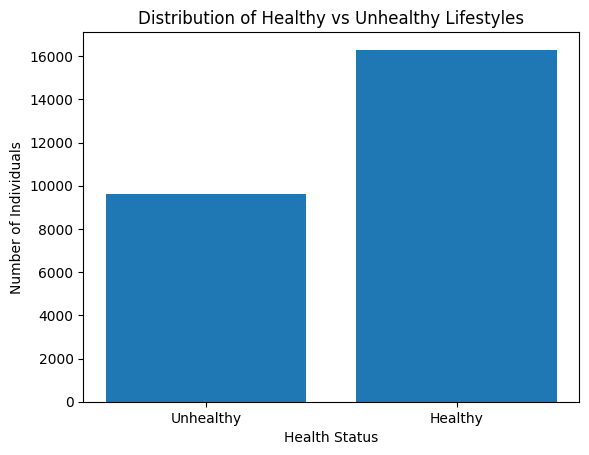

In [10]:
unique_values = train_data['Healthy'].unique()

value_counts = train_data['Healthy'].value_counts()

# Create a bar chart
plt.bar(unique_values, value_counts)
plt.xlabel('Health Status')
plt.ylabel('Number of Individuals')
plt.xticks(unique_values, [ 'Healthy', 'Unhealthy'])  
plt.title('Distribution of Healthy vs Unhealthy Lifestyles')
plt.show()

In [11]:
total_individuals = len(train_data)
percentage_healthy = (value_counts[1] / total_individuals) * 100
percentage_unhealthy = (value_counts[0] / total_individuals) * 100

print(percentage_healthy) 
print(percentage_unhealthy)

62.8858024691358
37.114197530864196


**Here, we can see high imbalance in our data. To adress this we can use undersampling  of healthy class but this will lead to loss of lot of information for our dataset. So we will see with proper regularization and by  using  class-weighted algorithm likr Random forrest we will make sure ,that training should be balanced both for minority class and majority class** 

**Let's see the outliers in our data**

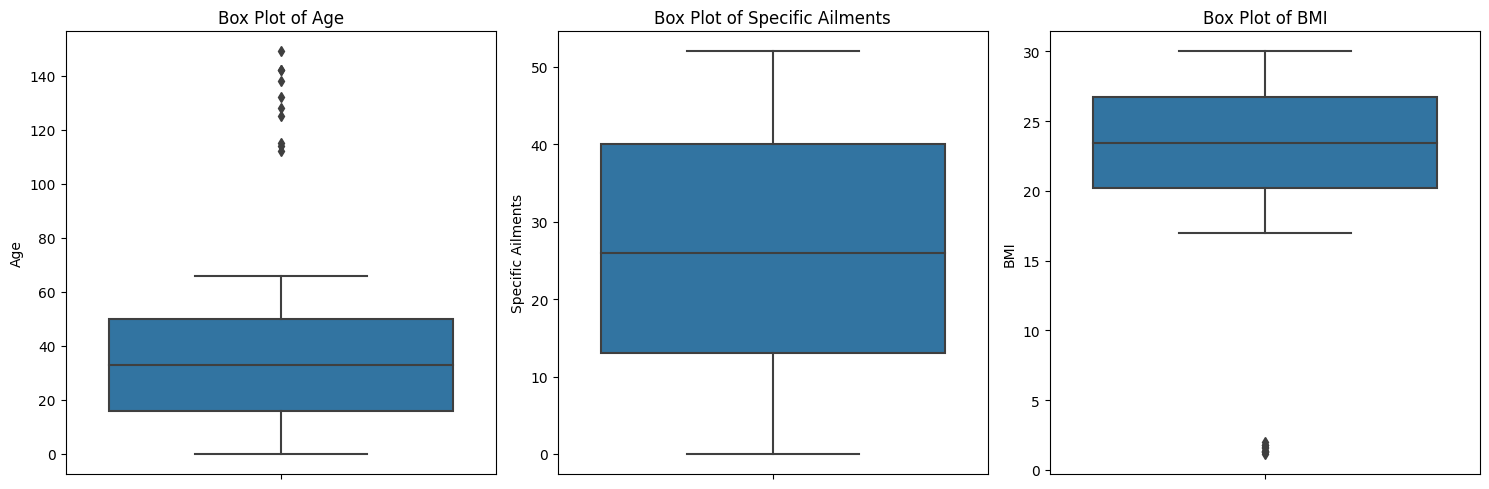

In [12]:
import seaborn as sns 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for 'age'
sns.boxplot(ax=axes[0], y=train_data['Age'])
axes[0].set_title('Box Plot of Age')
axes[0].set_ylabel('Age')

# Box plot for 'specific_ailments'
sns.boxplot(ax=axes[1], y=train_data['Specific ailments'])
axes[1].set_title('Box Plot of Specific Ailments')
axes[1].set_ylabel('Specific Ailments')

# Box plot for 'bmi'
sns.boxplot(ax=axes[2], y=train_data['BMI'])
axes[2].set_title('Box Plot of BMI')
axes[2].set_ylabel('BMI')

plt.tight_layout()
plt.show()


💡💡 we can see we have data that contain age of 100-120-140 that is practically not possible in these times 

And also we have some data of BMI that is very low that is obiously showing the underweight class of people. 

let's convert these age to elderly age of 60 to 80 

In [13]:
# Replace age outliers (age == 100) with values in the range of 60 to 80
train_data['Age'] = train_data['Age'].apply(lambda x: 60 if x >= 100 else x)

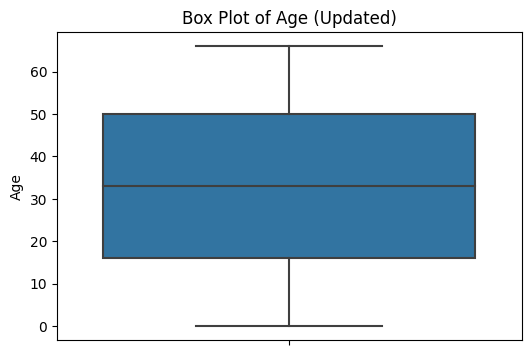

In [14]:
# updated box plot to check outliers 
plt.figure(figsize=(6, 4))
sns.boxplot(y=train_data['Age'])
plt.title('Box Plot of Age (Updated)')
plt.show()

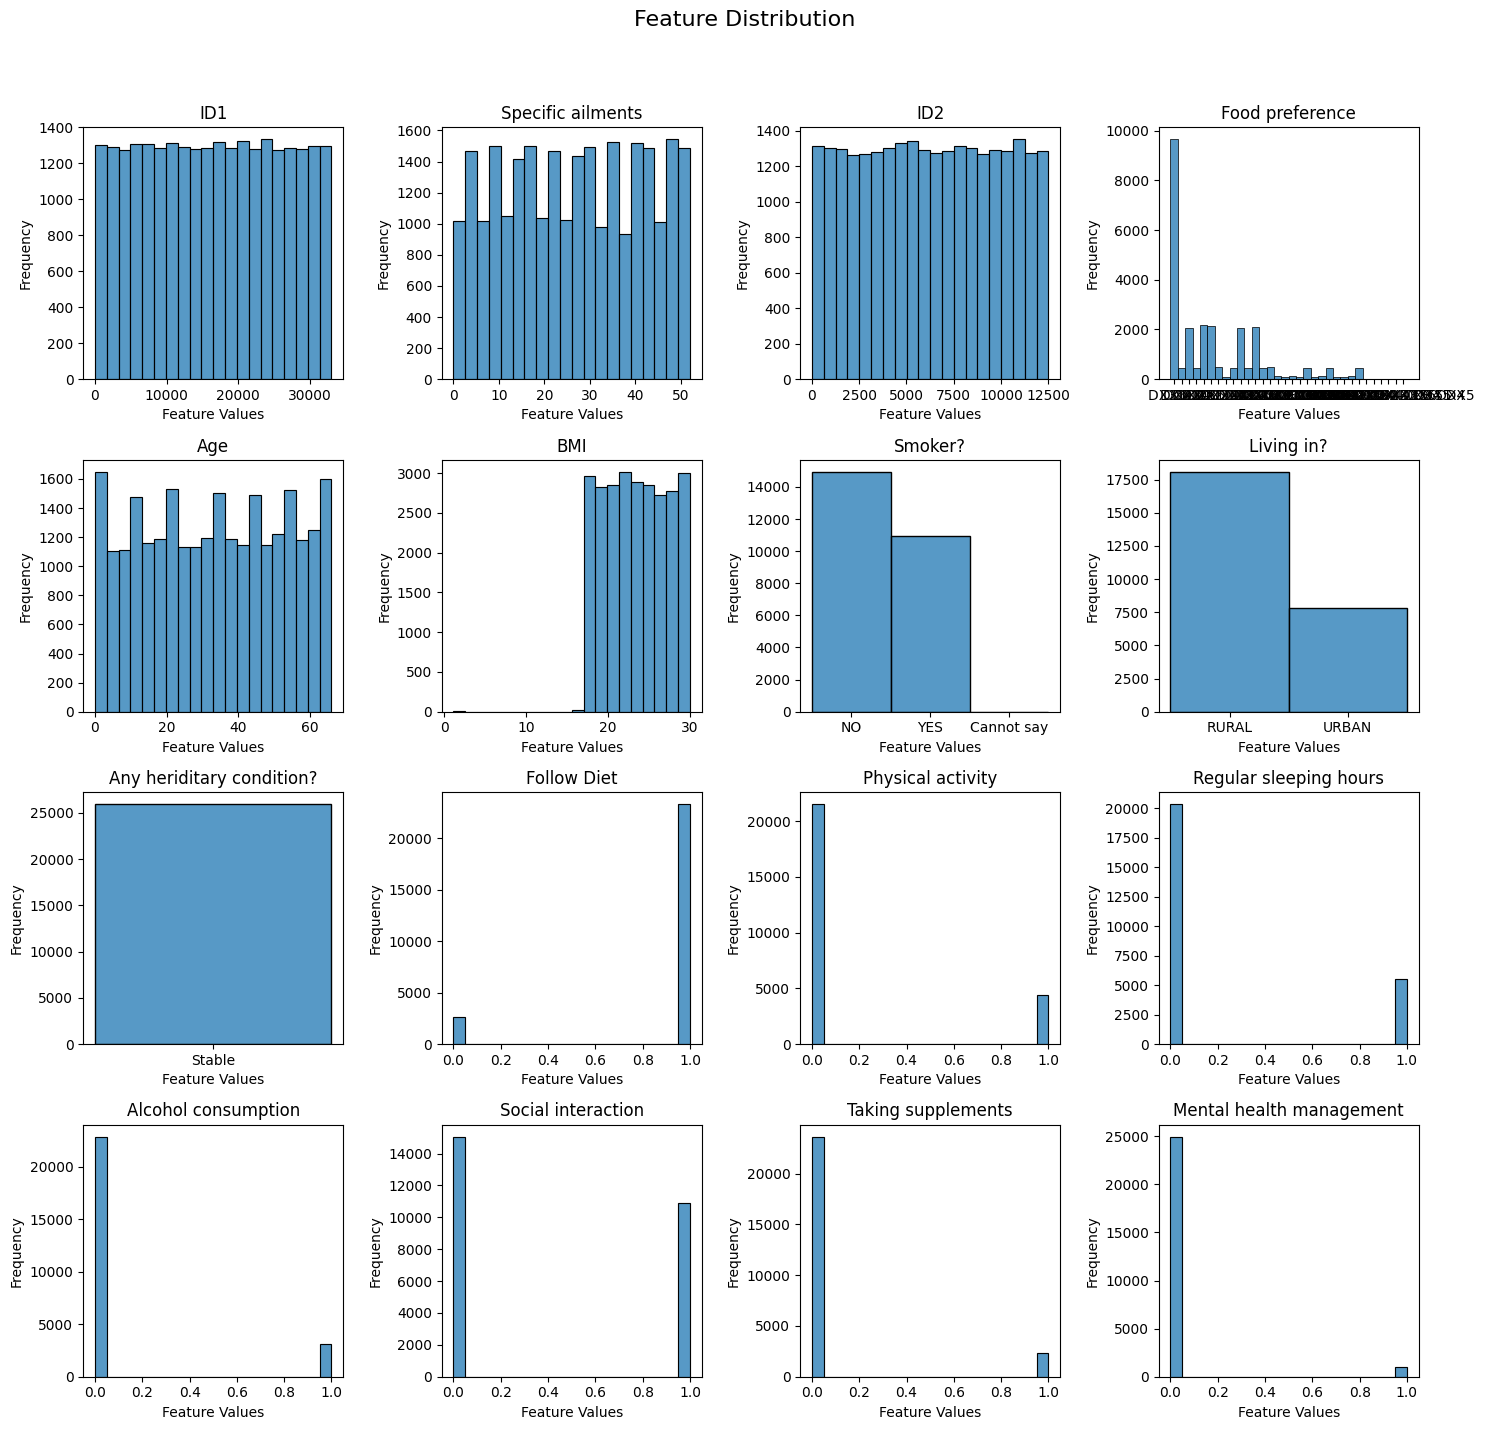

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle('Feature Distribution', fontsize=16)


for i, feature in enumerate(train_data.columns):
    row = i // 4
    col = i % 4
    if row < 4 and col < 4:  # Check for valid indices
        sns.histplot(data=train_data, x=feature, bins=20, ax=axes[row, col])
        axes[row, col].set_title(f'{feature}')
        axes[row, col].set_xlabel('Feature Values')
        axes[row, col].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



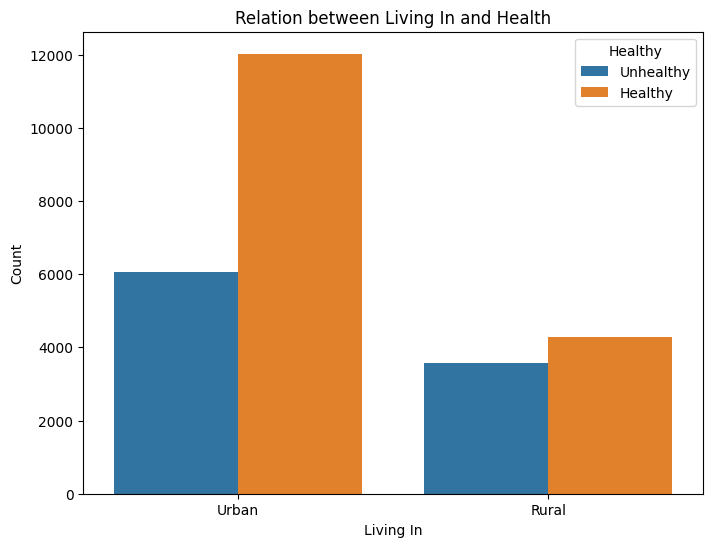

In [16]:
# Create a countplot to show the relationship between urban and rural people 
plt.figure(figsize=(8, 6))
sns.countplot(x = train_data['Living in?'], hue = train_data.Healthy)
plt.title('Relation between Living In and Health')
plt.xlabel('Living In')
plt.ylabel('Count')
plt.xticks([1, 0], ['Rural', 'Urban'])
plt.legend(title='Healthy', labels=['Unhealthy', 'Healthy'])
plt.show()

**👀 people living in rural area are more healthy**

# Converting  categorical features

In [17]:
train_data.dtypes

ID1                            int64
Specific ailments              int64
ID2                            int64
Food preference               object
Age                            int64
BMI                          float64
Smoker?                       object
Living in?                    object
Any heriditary condition?     object
Follow Diet                  float64
Physical activity            float64
Regular sleeping hours       float64
Alcohol consumption          float64
Social interaction           float64
Taking supplements           float64
Mental health management     float64
Illness count last year      float64
Healthy                        int64
dtype: object

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_features = ['Food preference', 'Living in?', 'Any heriditary condition?', 'Smoker?']

label_encoder = LabelEncoder()
train_data[categorical_features] = train_data[categorical_features].apply(lambda x: label_encoder.fit_transform(x.astype(str)))

# Normalizing numerical features:

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_features = ['Age', 'BMI', 'Follow Diet', 'Physical activity', 'Regular sleeping hours',
                      'Alcohol consumption', 'Social interaction', 'Taking supplements',
                      'Mental health management', 'Illness count last year']

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])


In [20]:
train_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,31,0.812091,-0.781165,1,0,0,0.333976,-0.453225,-0.523353,-0.366815,-0.850128,-0.311826,-0.198543,-0.944922,1
1,25063,39,10363,25,-0.679279,0.689686,1,1,0,-2.994227,-0.453225,-0.523353,-0.366815,1.176294,-0.311826,-0.198543,-0.944922,1
2,26798,29,132,31,-1.656383,-0.538385,1,1,0,0.333976,-0.453225,-0.523353,-0.366815,-0.850128,-0.311826,-0.198543,-0.944922,0
3,31907,27,10499,0,-0.165013,0.459321,1,0,0,0.333976,-0.453225,-0.523353,-0.366815,-0.850128,-0.311826,-0.198543,-0.944922,1
4,26412,9,7963,31,0.349252,-1.083090,2,0,0,0.333976,-0.453225,-0.523353,-0.366815,1.176294,-0.311826,-0.198543,0.359321,1


# Feature Selection 

In [21]:
X = train_data.drop('Healthy', axis=1)
y = train_data['Healthy']

# Correlation analysis
correlation_matrix = X.corr()
correlated_features = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
print(correlated_features)

# Feature importance with Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

ID1                       ID1                          1.000000
Taking supplements        Mental health management     0.629603
Mental health management  Alcohol consumption          0.535015
Social interaction        Illness count last year      0.468512
Physical activity         Mental health management     0.432695
                                                         ...   
Taking supplements        Follow Diet                  0.001128
ID2                       Alcohol consumption          0.000708
Age                       BMI                          0.000444
ID2                       Food preference              0.000252
ID1                       Any heriditary condition?         NaN
Length: 122, dtype: float64
BMI                          0.190342
Food preference              0.151276
Specific ailments            0.151061
Age                          0.113852
ID1                          0.104230
ID2                          0.093981
Smoker?                      0.069950
Il

In [22]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Healthy', axis=1)
y = train_data['Healthy']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (20736, 17) (20736,)
Validation set shape: (5184, 17) (5184,)


# Model Selection and Evaluation 

# 1. Logistic Regression 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.652391975308642
Precision: 0.6811168258633358
Recall: 0.8476074367570863
F1-score: 0.7552960347637154


# 2. Random Forrest Classifier

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8221450617283951
Precision: 0.851564828614009
Recall: 0.8707711063700091
F1-score: 0.8610608800482219


Hence we will use the RandomForestClassifier() algorithm for the model prediction on our Test Data 

# loading test data now 

In [25]:
test_data = pd.read_csv("C:\\Users\\91777\\Documents\\IIT GHY\\Healthy Lifestyle Model\\Test_Data (1).csv")

In [26]:
test_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


# Test Data Preprocessing 

In [27]:
test_data.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                3
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  262
Physical activity            262
Regular sleeping hours       262
Alcohol consumption          262
Social interaction           262
Taking supplements           262
Mental health management     262
Illness count last year      262
dtype: int64

In [28]:
test_data['Follow Diet'].fillna(1.0, inplace=True)
test_data['Food preference'].fillna('DX6', inplace=True)


In [29]:
columns_with_missing = ['Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
                        'Social interaction', 'Taking supplements', 'Mental health management',
                        'Illness count last year']
test_data[columns_with_missing] = test_data[columns_with_missing].fillna(1.0)

In [30]:
test_data.dtypes

ID1                            int64
Specific ailments              int64
ID2                            int64
Food preference               object
Age                            int64
BMI                          float64
Smoker?                       object
Living in?                    object
Any heriditary condition?     object
Follow Diet                  float64
Physical activity            float64
Regular sleeping hours       float64
Alcohol consumption          float64
Social interaction           float64
Taking supplements           float64
Mental health management     float64
Illness count last year      float64
dtype: object

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_features = ['Food preference', 'Living in?', 'Any heriditary condition?', 'Smoker?']

label_encoder = LabelEncoder()
test_data[categorical_features] = test_data[categorical_features].apply(lambda x: label_encoder.fit_transform(x.astype(str)))

# Normalizing the Numerical features of my Test Data 

In [32]:
# Numerical features
numerical_features = ['Age', 'BMI', 'Follow Diet', 'Physical activity', 'Regular sleeping hours',
                      'Alcohol consumption', 'Social interaction', 'Taking supplements',
                      'Mental health management', 'Illness count last year']

scaler = StandardScaler()
test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])

# Feature Selection on Test Data 

In [33]:
correlation_matrix = X.corr()
correlated_features = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
print(correlated_features)

# Feature importance with Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

ID1                       ID1                          1.000000
Taking supplements        Mental health management     0.629603
Mental health management  Alcohol consumption          0.535015
Social interaction        Illness count last year      0.468512
Physical activity         Mental health management     0.432695
                                                         ...   
Taking supplements        Follow Diet                  0.001128
ID2                       Alcohol consumption          0.000708
Age                       BMI                          0.000444
ID2                       Food preference              0.000252
ID1                       Any heriditary condition?         NaN
Length: 122, dtype: float64
BMI                          0.189501
Food preference              0.151811
Specific ailments            0.150835
Age                          0.113389
ID1                          0.105072
ID2                          0.093395
Smoker?                      0.071455
Il

In [34]:
X_test = test_data

# Calculation of Feature Importance - SHAP VALUES 

In [35]:
from tqdm import tqdm

In [36]:
test_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,31,0.247857,-1.181364,2,1,0,-3.063432,-0.457856,-0.527836,-0.375561,-0.838197,3.119051,-0.206492,-0.926727
1,7970,5,5573,0,0.657777,-0.565163,1,1,0,0.326431,-0.457856,-0.527836,-0.375561,-0.838197,-0.320610,-0.206492,-0.926727
2,22039,37,9305,28,-1.135621,-1.446280,1,0,0,0.326431,-0.457856,-0.527836,-0.375561,-0.838197,-0.320610,-0.206492,-0.926727
3,12332,44,8274,30,-1.186861,0.915740,1,0,0,0.326431,-0.457856,-0.527836,2.662684,-0.838197,-0.320610,-0.206492,0.355612
4,4116,37,4558,25,-1.545540,-0.007083,1,0,0,-3.063432,2.184092,-0.527836,2.662684,-0.838197,-0.320610,-0.206492,0.355612


In [37]:
from tqdm import tqdm

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train, y_train)


perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({'Feature': X_train.columns,
                              'Importance': perm_importance.importances_mean})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importances')
plt.tight_layout()
plt.show()



**Hence food preferences , BMI, Specific ailments, smoking habbits and Age are the key drivers for the healthy Lifestyle 🤔📉🔓** 